In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Download Apple stock data from Jan 1 to Mar 1, 2023
data = yf.download("AAPL", start="2023-01-01", end="2023-03-01")

# Keep only the 'Close' column
data = data[['Close']]

data.dropna(inplace=True)

# removes multi index and make data into 2 columns only : date and close
data = data.droplevel(0, axis=1)  #remove ticker
data.columns = ['Close'] #rename price to close
data.reset_index(inplace=True) #make 0,1,2.. as index
data.to_csv("../data/apple_60days_raw.csv")

data.head()




C:\Users\User\AppData\Local\Temp\ipykernel_6824\2231484739.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2023-01-01", end="2023-03-01")
[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2023-01-03,123.470612
1,2023-01-04,124.744125
2,2023-01-05,123.421257
3,2023-01-06,127.962440
4,2023-01-09,128.485641


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Normalized_Close'] = scaler.fit_transform(data[['Close']])  #normalize
data.head()
data.to_csv('../data/preprocessed_data.csv', index=False)


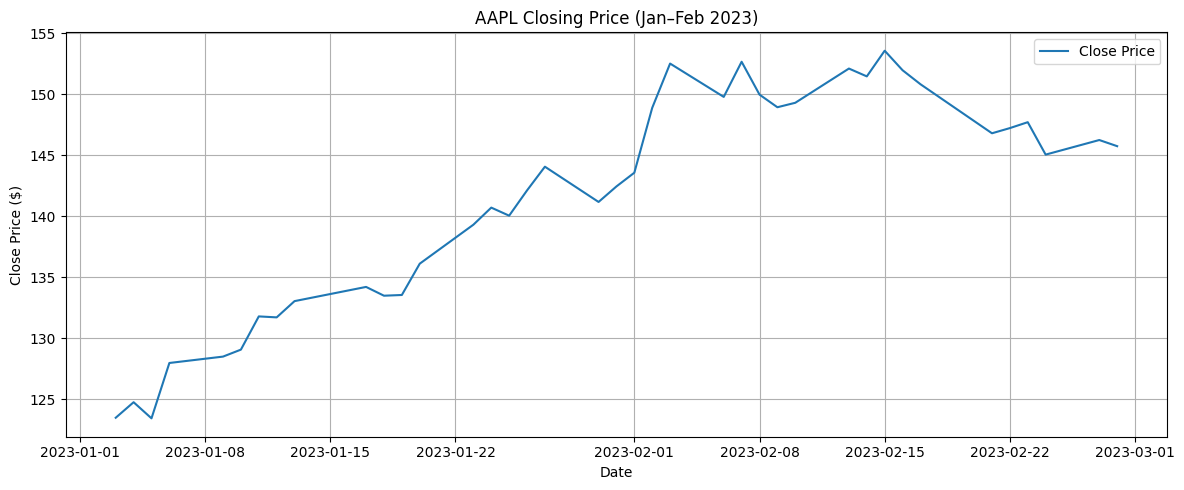

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.title('AAPL Closing Price (Jan–Feb 2023)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
